### **IMPORTING LIBRARIES**

In [1]:
#LIBRARY FOR MANIPULATING CHARTS/GRAPHS/FIGURES
import matplotlib.pyplot as plt

#LIBRARY FOR PLOTTING CHARTS/GRAPHS/FIGURES
import seaborn as sns

#LIBRARY FOR DATAFRAME MANIPULATION
import pandas as pd

#LIBRARY FOR EASY-WORKING WITH ARRAYS/MATRICES
import numpy as np

#LIBRARY FOR MATHEMATICAL FUNCTIONS
import math

### **IMPORTING AND SPLITTING MNIST DATASET**

In [2]:
import tensorflow as tf

(X_train, Y_train), (X_test, Y_test) = tf.keras.datasets.mnist.load_data()

In [3]:
#CONVERTING THE X-Y-TRAIN-TEST DATA TO NUMPY ARRAYS FOR EASY MANIPULATION
X_train = np.array(X_train)
X_test = np.array(X_test)
Y_train = np.array(Y_train)
Y_test = np.array(Y_test)

### **NORMALISING PIXEL VALUES FROM 0-1**

In [4]:
#NORMALISING THE PIXEL VALUES FROM 0-255 to 0.00-1.00
X_train = X_train/255
X_test = X_test/255

### **DIGIT_PLOTTING FUNCTION**

In [5]:
#FUNCTION THAT TAKES IN A DATAFRAME AND ONE OF ITS INDEX TO PLOT THE DIGIT PIXELS AT THE INDEX
def digit_plotter(dataframe, index):
  #RESHAPING AN ARRAY OF 784 ELEMENTS INTO 28x28 MATRIX
  matrix = np.reshape(dataframe[index], (28, 28))
  #PLOt-SIZING TO 5x5
  plt.figure(figsize = (5,4))
  #PLOT TITLE
  plt.title('Index-{}'.format(index))
  #PLOTTING THE PIXELS OF THE MATRIX
  sns.heatmap(data = matrix, cmap = 'Greys_r')
  #ENDING THE PLOT
  plt.show()

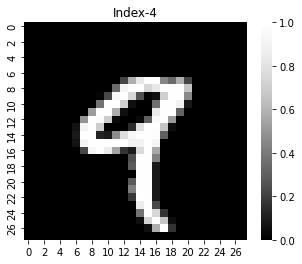

In [6]:
#TESTING THE DIGIT PLOTTING FUNCTION AT TRAINING_DATA INDEX-4
digit_plotter(X_train, 4)

In [7]:
Y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

### **TRAINING NEURAL NETWORK TO CLASSIFY THE DIGITS**

In [9]:
import tensorflow as tf

model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=32, input_shape=(28,28,1), kernel_size=(3,3), activation = 'relu', padding="same", strides=1),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
    tf.keras.layers.Conv2D(filters=16, kernel_size=(3,3), activation = 'relu', padding="same", strides=1),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(10, activation='sigmoid'),        
])

model.compile(optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

model.fit(X_train, Y_train, epochs=30, validation_data=(X_test, Y_test))

Epoch 1/30
1875/1875 [==============================] - 64s 33ms/step - loss: 0.1797 - accuracy: 0.9440 - val_loss: 0.0724 - val_accuracy: 0.9752
Epoch 2/30
1875/1875 [==============================] - 64s 34ms/step - loss: 0.0548 - accuracy: 0.9827 - val_loss: 0.0446 - val_accuracy: 0.9838
Epoch 3/30
1875/1875 [==============================] - 63s 34ms/step - loss: 0.0381 - accuracy: 0.9881 - val_loss: 0.0324 - val_accuracy: 0.9892
Epoch 4/30
1875/1875 [==============================] - 64s 34ms/step - loss: 0.0305 - accuracy: 0.9903 - val_loss: 0.0326 - val_accuracy: 0.9882
Epoch 5/30
1875/1875 [==============================] - 60s 32ms/step - loss: 0.0242 - accuracy: 0.9922 - val_loss: 0.0401 - val_accuracy: 0.9875
Epoch 6/30
1875/1875 [==============================] - 61s 33ms/step - loss: 0.0192 - accuracy: 0.9934 - val_loss: 0.0314 - val_accuracy: 0.9906
Epoch 7/30
1875/1875 [==============================] - 63s 34ms/step - loss: 0.0171 - accuracy: 0.9946 - val_loss: 0.0370 -

### **CLASSIFICATION REPORT**

In [10]:
actual = Y_test
predictions = np.array(list(map(np.argmax, model.predict(X_test))))

313/313 [==============================] - 5s 12ms/step


In [11]:
from sklearn.metrics import accuracy_score, precision_score, f1_score, recall_score, confusion_matrix

for i in range(0, 9):
    actual_digit = (actual == i)
    predict_digit = (predictions == i)
    print('\tDIGIT-{}'.format(i))
    print('Accuracy Score:\t\t {}%'.format(round(100*accuracy_score(actual_digit, predict_digit), 2)))
    print('Precision Score:\t {}%'.format(round(100*precision_score(actual_digit, predict_digit), 2)))
    print('Recall Score:\t\t {}%'.format(round(100*recall_score(actual_digit, predict_digit), 2)))
    print('F1 Score:\t\t {}%'.format(round(100*f1_score(actual_digit, predict_digit), 2)))
    print()

	DIGIT-0
Accuracy Score:		 99.92%
Precision Score:	 99.29%
Recall Score:		 99.9%
F1 Score:		 99.59%

	DIGIT-1
Accuracy Score:		 99.89%
Precision Score:	 99.56%
Recall Score:		 99.47%
F1 Score:		 99.52%

	DIGIT-2
Accuracy Score:		 99.82%
Precision Score:	 98.84%
Recall Score:		 99.42%
F1 Score:		 99.13%

	DIGIT-3
Accuracy Score:		 99.76%
Precision Score:	 97.96%
Recall Score:		 99.7%
F1 Score:		 98.82%

	DIGIT-4
Accuracy Score:		 99.84%
Precision Score:	 99.39%
Recall Score:		 98.98%
F1 Score:		 99.18%

	DIGIT-5
Accuracy Score:		 99.79%
Precision Score:	 99.21%
Recall Score:		 98.43%
F1 Score:		 98.82%

	DIGIT-6
Accuracy Score:		 99.85%
Precision Score:	 99.17%
Recall Score:		 99.27%
F1 Score:		 99.22%

	DIGIT-7
Accuracy Score:		 99.81%
Precision Score:	 99.22%
Recall Score:		 98.93%
F1 Score:		 99.07%

	DIGIT-8
Accuracy Score:		 99.8%
Precision Score:	 99.28%
Recall Score:		 98.67%
F1 Score:		 98.97%



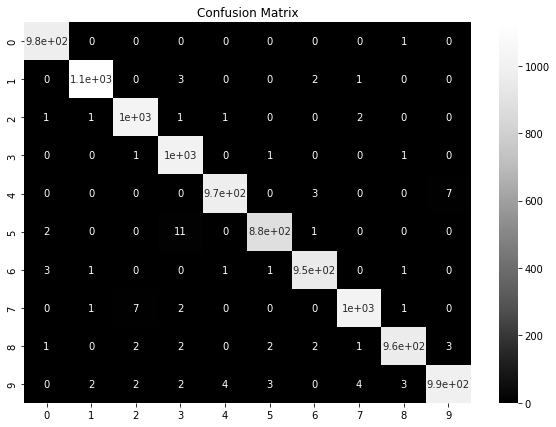

In [12]:
plt.figure(figsize=(10, 7))
plt.title('Confusion Matrix')
sns.heatmap(confusion_matrix(actual, predictions), cmap='Greys_r', annot=True)
plt.show()

### **FUNCTION TO PREDICT DIGIT BASED ON IMAGE (WRITTEN IN FILEPATH)**

1/1 [==============================] - 0s 26ms/step


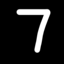

PREDICTED DIGIT: 7
1/1 [==============================] - 0s 26ms/step


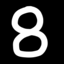

PREDICTED DIGIT: 3
1/1 [==============================] - 0s 42ms/step


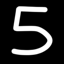

PREDICTED DIGIT: 5
1/1 [==============================] - 0s 33ms/step


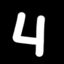

PREDICTED DIGIT: 4
1/1 [==============================] - 0s 19ms/step


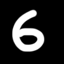

PREDICTED DIGIT: 5
1/1 [==============================] - 0s 18ms/step


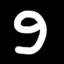

PREDICTED DIGIT: 9
1/1 [==============================] - 0s 35ms/step


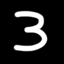

PREDICTED DIGIT: 3
1/1 [==============================] - 0s 31ms/step


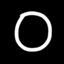

PREDICTED DIGIT: 0
1/1 [==============================] - 0s 19ms/step


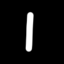

PREDICTED DIGIT: 1
1/1 [==============================] - 0s 31ms/step


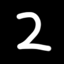

PREDICTED DIGIT: 2


In [29]:
import tensorflow as tf
import pickle
import PIL
import numpy as np

def digit_identifier(filepath):
    image = PIL.Image.open(filepath)
    image_resized = image.resize((28, 28))
    image_greyscale = PIL.ImageOps.grayscale(image_resized)
    image_matrix = np.array(image_greyscale)
    prediction = np.argmax(model.predict(np.array([image_matrix])))
    display(image.resize((64, 64)))
    print('PREDICTED DIGIT:', prediction)
    return prediction
for i in range(10):
    digit_identifier('sample{}.png'.format(i))